In [197]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from collections import defaultdict
from scipy.stats import pearsonr
plt.rcParams['svg.fonttype'] = 'none'

In [215]:
def interpolate(df, new_index):
    """Return a new DataFrame with all columns values interpolated
    to the new_index values."""
    df_out = pd.DataFrame(index=new_index)
    df_out.index.name = df.index.name

    for colname, col in df.iteritems():
        df_out[colname] = np.interp(new_index, df.index, col)
    return df_out

In [192]:
def parse_data(data):
    o = [2,1,0]
    parsed_data = {}
    for k,df in data.items():
        info = k.split('_')
        info = [i.replace(' ','') for i in info]
        d = parsed_data
        for i in o:
            if info[i] not in d:
                d[info[i]] = {}
            d = d[info[i]]
        parsed_data[info[o[0]]][info[o[1]]][info[o[2]]] = df
    return parsed_data

In [322]:
def plot_data(parsed_data,ax=ax,idx=idx):
    for substrate,d in parsed_data.items():
        for data_type,d in d.items():
            stats = {}
            j = 1 if data_type == 'conc' else 0
            for source,df in d.items():
                marker = 'o' if source == 'exp' else ''
                x = df.index
                y = df[df.columns[0]]
                inter_df = interpolate(df,d['exp'].index)
                r2,p = pearsonr(inter_df[inter_df.columns[0]],d['exp'][d['exp'].columns[0]])
                ax[j][idx].plot(x,y,label=source,marker=marker)
#                 xmax = 100 if data_type == 'conc' else 1.5
                ymax = 110 if data_type == 'conc' else 1.75
                ymin = 100*-0.05 if data_type == 'conc' else 1.75*-0.05
    
                ax[j][idx].set_ylim(ymin,ymax)
                ax[j][idx].legend()
                stats[source] = {'r2':r2,'p':np.log10(p)}
            print(substrate,data_type)
            stats_df = pd.DataFrame.from_dict(stats)
            print(stats_df)
        idx += 1
    return idx

/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


mal growth
    exp       sim  simPaper
r2  1.0  0.992982  0.972408
p  -inf -6.065634 -4.288723
mal conc
         exp       sim  simPaper
r2  1.000000  0.995275  0.990525
p  -7.872385 -1.208211 -1.056976
malLac conc
         exp       sim  simPaper
r2  1.000000  0.985856  0.998901
p  -7.872385 -0.969811 -1.525160
malLac growth
    exp       sim  simPaper
r2  1.0  0.988983  0.955230
p  -inf -5.479434 -3.663795
2
aceSucc conc
       exp       sim  simPaper
r2  1.0000  0.999959  0.999948
p  -8.0229 -2.240753 -2.188062
aceSucc growth
    exp       sim  simPaper
r2  1.0  0.986560  0.930792
p  -inf -6.852438 -4.034927
3


/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


aceGlyc conc
    exp       sim  simPaper
r2  1.0  0.870336  0.874378
p  -inf -0.484386 -0.491417
aceGlyc growth
    exp       sim  simPaper
r2  1.0  0.892824  0.881447
p  -inf -4.032466 -3.821993
4
glycSucc conc
    exp       sim  simPaper
r2  1.0  0.998789  0.995981
p  -inf -1.503985 -1.243385
glycSucc growth
    exp        sim  simPaper
r2  1.0   0.998825  0.993795
p  -inf -11.079855 -8.191382
5


/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/jt/me_modeling_new/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


glyc growth
    exp        sim  simPaper
r2  1.0   0.989517  0.913531
p  -inf -11.584455 -5.708144
glyc conc
         exp       sim  simPaper
r2  1.000000  0.988932  0.994587
p  -7.872385 -1.023164 -1.178693
glycLac conc
         exp       sim  simPaper
r2  1.000000  0.996581  0.994229
p  -7.872385 -1.278543 -1.164777
glycLac growth
    exp        sim   simPaper
r2  1.0   0.999444   0.999719
p  -inf -21.354279 -23.426373
7
buty growth
    exp       sim
r2  1.0  0.940251
p  -inf -3.790817
buty conc
    exp       sim
r2  1.0  0.769789
p  -inf -0.355834
butyLac conc
    exp       sim
r2  1.0  0.969330
p  -inf -0.801134
butyLac growth
          exp       sim
r2   1.000000  0.990752
p  -61.973261 -7.499637
9


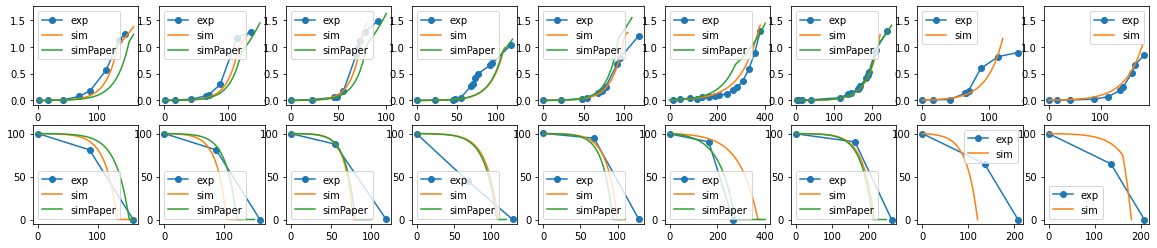

In [323]:
idx = 0
fig,ax = plt.subplots(2,9,figsize=(20,4))
for i in os.listdir():
    if 'xlsx' not in i: continue
    data = pd.read_excel(i,sheet_name=None,index_col=0)
    idx = plot_data(parse_data(data),ax=ax,idx=idx)
    print(idx)
plt.savefig('sims.svg',format='SVG')    